<a href="https://colab.research.google.com/github/shumshersubashgautam/Multimodal_RAG_Llava7B_HealthcareAPP/blob/main/Multimodal_RAG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -q -U transformers==4.37.2
!pip install -q bitsandbytes==0.41.3 accelerate==0.25.0
!pip install -q git+https://github.com/openai/whisper.git
!pip install -q gradio
!pip install -q gTTS

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


In [2]:
import torch
from transformers import BitsAndBytesConfig, pipeline

In [3]:
quantization_config = BitsAndBytesConfig(
    load_in_4bit=True,
    bnb_4bit_compute_dtype=torch.float16
)

In [4]:
model_id = "llava-hf/llava-1.5-7b-hf"

In [5]:
pipe = pipeline("image-to-text",
                model=model_id,
                model_kwargs={"quantization_config": quantization_config})

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


Loading checkpoint shards:   0%|          | 0/3 [00:00<?, ?it/s]

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


In [6]:
import whisper
import gradio as gr
import time
import warnings
import os
from gtts import gTTS

In [7]:
from PIL import Image

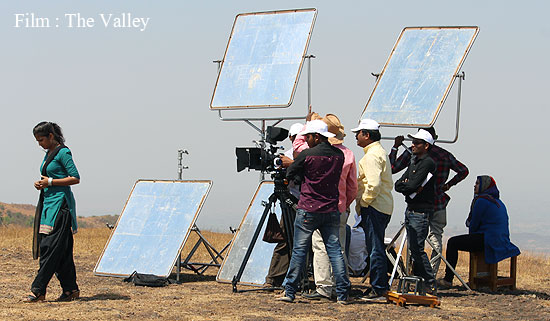

In [8]:
image_path = "flim.jpg"
image = Image.open((image_path))
image

In [9]:
import nltk
nltk.download('punkt')
from nltk import sent_tokenize

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [10]:
import locale
print(locale.getlocale())  # Before running the pipeline
# Run the pipeline
print(locale.getlocale())  # After running the pipeline

('en_US', 'UTF-8')
('en_US', 'UTF-8')


In [11]:
max_new_tokens = 200

prompt_instructions = """
Describe the image using as much detail as possible,
is it a painting, a photograph, what colors are predominant,
what is the image about?
"""

prompt = "USER: <image>\n" + prompt_instructions + "\nASSISTANT:"

outputs = pipe(image, prompt=prompt, generate_kwargs={"max_new_tokens": 200})
# outputs
# print(outputs[0]["generated_text"])
for sent in sent_tokenize(outputs[0]["generated_text"]):
    print(sent)

USER:  

Describe the image using as much detail as possible,
is it a painting, a photograph, what colors are predominant,
what is the image about?
ASSISTANT: The image features a group of people standing in a field, possibly on a movie set.
There are at least 11 people in the scene, with some of them wearing hats.
The people are scattered around the field, with some standing closer to the foreground and others further back.
In the field, there are two umbrellas, one located in the middle of the scene and the other towards the right side.
Additionally, there is a backpack placed on the ground, possibly belonging to one of the people in the scene.
The overall atmosphere of the image suggests a casual, outdoor gathering.


In [12]:
warnings.filterwarnings("ignore")

In [13]:
import warnings
from gtts import gTTS
import numpy as np

In [14]:
torch.cuda.is_available()
DEVICE = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using torch {torch.__version__} ({DEVICE})")

Using torch 2.3.0+cu121 (cuda)


In [15]:
import whisper
model = whisper.load_model("medium", device=DEVICE)
print(
    f"Model is {'multilingual' if model.is_multilingual else 'English-only'} "
    f"and has {sum(np.prod(p.shape) for p in model.parameters()):,} parameters."
)

Model is multilingual and has 762,321,920 parameters.


In [16]:
import re

In [17]:
input_text = 'What color of actor girl dress in image?'
input_image = 'flim.jpg'

# load the image
image = Image.open(input_image)

# prompt_instructions = """
# Describe the image using as much detail as possible, is it a painting, a photograph, what colors are predominant, what is the image about?
# """

# print(input_text)
prompt_instructions = """
Act as an expert in imagery descriptive analysis, using as much detail as possible from the image, respond to the following prompt:
""" + input_text
prompt = "USER: <image>\n" + prompt_instructions + "\nASSISTANT:"

# print(prompt)

outputs = pipe(image, prompt=prompt, generate_kwargs={"max_new_tokens": 200})

match = re.search(r'ASSISTANT:\s*(.*)', outputs[0]["generated_text"])

if match:
    # Extract the text after "ASSISTANT:"
    extracted_text = match.group(1)
    print(extracted_text)
else:
    print("No match found.")

for sent in sent_tokenize(outputs[0]["generated_text"]):
    print(sent)

In the image, there is a group of people standing around a camera set up. One of the individuals is wearing a white hat. The image also features a couple of umbrellas, which are open and located in the background. The presence of the camera and the people gathered around it suggests that they might be involved in a film or photography project. The specific details about the girl's dress color are not provided, so I cannot confidently answer that question.
USER:  

Act as an expert in imagery descriptive analysis, using as much detail as possible from the image, respond to the following prompt:
What color of actor girl dress in image?
ASSISTANT: In the image, there is a group of people standing around a camera set up.
One of the individuals is wearing a white hat.
The image also features a couple of umbrellas, which are open and located in the background.
The presence of the camera and the people gathered around it suggests that they might be involved in a film or photography project.
T

In [18]:
import datetime
import os

In [19]:
## Logger file
tstamp = datetime.datetime.now()
tstamp = str(tstamp).replace(' ','_')
logfile = f'{tstamp}_log.txt'
def writehistory(text):
    with open(logfile, 'a', encoding='utf-8') as f:
        f.write(text)
        f.write('\n')
    f.close()

In [20]:
import re
import requests
from PIL import Image

def img2txt(input_text, input_image):

    # load the image
    image = Image.open(input_image)

    writehistory(f"Input text: {input_text} - Type: {type(input_text)} - Dir: {dir(input_text)}")
    if type(input_text) == tuple:
        prompt_instructions = """
        Describe the image using as much detail as possible, is it a painting, a photograph, what colors are predominant, what is the image about?
        """
    else:
        prompt_instructions = """
        Act as an expert in imagery descriptive analysis, using as much detail as possible from the image, respond to the following prompt:
        """ + input_text

    writehistory(f"prompt_instructions: {prompt_instructions}")
    prompt = "USER: <image>\n" + prompt_instructions + "\nASSISTANT:"

    outputs = pipe(image, prompt=prompt, generate_kwargs={"max_new_tokens": 200})

    # Properly extract the response text
    if outputs is not None and len(outputs[0]["generated_text"]) > 0:
        match = re.search(r'ASSISTANT:\s*(.*)', outputs[0]["generated_text"])
        if match:
            # Extract the text after "ASSISTANT:"
            reply = match.group(1)
        else:
            reply = "No response found."
    else:
        reply = "No response generated."

    return reply

In [21]:
def transcribe(audio):

    # Check if the audio input is None or empty
    if audio is None or audio == '':
        return ('','',None)  # Return empty strings and None audio file

    # language = 'en'

    audio = whisper.load_audio(audio)
    audio = whisper.pad_or_trim(audio)

    mel = whisper.log_mel_spectrogram(audio).to(model.device)

    _, probs = model.detect_language(mel)

    options = whisper.DecodingOptions()
    result = whisper.decode(model, mel, options)
    result_text = result.text

    return result_text

In [22]:
def text_to_speech(text, file_path):
    language = 'en'

    audioobj = gTTS(text = text,
                    lang = language,
                    slow = False)

    audioobj.save(file_path)

    return file_path

In [23]:
import locale
import subprocess

# Set the locale to C.UTF-8
locale.setlocale(locale.LC_ALL, 'C.UTF-8')

# Verify the locale setting
print(locale.getlocale())

# Now you can run your shell command
subprocess.run(['ffmpeg', '-f', 'lavfi', '-i', 'anullsrc=r=44100:cl=mono', '-t', '10', '-q:a', '9', '-acodec', 'libmp3lame', 'Temp.mp3'])


('en_US', 'UTF-8')


CompletedProcess(args=['ffmpeg', '-f', 'lavfi', '-i', 'anullsrc=r=44100:cl=mono', '-t', '10', '-q:a', '9', '-acodec', 'libmp3lame', 'Temp.mp3'], returncode=1)

In [24]:
# !ffmpeg -f lavfi -i anullsrc=r=44100:cl=mono -t 10 -q:a 9 -acodec libmp3lame Temp.mp3

In [25]:
# !ffmpeg -f lavfi -i anullsrc=r=44100:cl=mono -t 10 -q:a 9 -acodec libmp3lame Temp.mp3

In [ ]:
import gradio as gr
import base64
import os

# A function to handle audio and image inputs
def process_inputs(audio_path, image_path):
    # Process the audio file (assuming this is handled by a function called 'transcribe')
    speech_to_text_output = transcribe(audio_path)

    # Handle the image input
    if image_path:
        chatgpt_output = img2txt(speech_to_text_output, image_path)
    else:
        chatgpt_output = "No image provided."

    # Assuming 'transcribe' also returns the path to a processed audio file
    processed_audio_path = text_to_speech(chatgpt_output, "Temp3.mp3")  # Replace with actual path if different

    return speech_to_text_output, chatgpt_output, processed_audio_path

# Create the interface
iface = gr.Interface(
    fn=process_inputs,
    inputs=[
        gr.Audio(sources=["microphone"], type="filepath"),
        gr.Image(type="filepath")
    ],
    outputs=[
        gr.Textbox(label="Speech to Text"),
        gr.Textbox(label="ChatGPT Output"),
        gr.Audio("Temp.mp3")
    ],
    title="Learn OpenAI Whisper: Image processing with Whisper and Llava",
    description="Upload an image and interact via voice input and audio response."
)

# Launch the interface
iface.launch(debug=True)

Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
Running on public URL: https://3aa05e9c093c2d613c.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)
